In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [26]:
df1 = pd.read_csv('Data/df1.csv')
df2 = pd.read_csv('Data/df2.csv')
df = pd.concat([df1,df2],0)
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

C:\Users\crazy\AppData\Local\Temp/ipykernel_15404/3803886641.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df1,df2],0)


In [27]:
df.head()

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness
0,(Nice Dream),The Bends,Radiohead,4QbQ55kHcRNho6XLaPctT1,1995-03-28,55,0.262,0.567,0.377,-11.075
1,15 Step,In Rainbows,Radiohead,6dsq7Nt5mIFzvm5kIYNORy,2007-12-28,61,0.600,0.853,0.847,-7.584
2,2 + 2 = 5,Hail To the Thief,Radiohead,37kUGdEJJ7NaMl5LFW4EA4,2003,57,0.443,0.717,0.386,-5.498
3,A Brain in a Bottle,Tomorrow's Modern Boxes,Thom Yorke,0ztEZNjeZQ45nMcsqYxxyc,2014,43,0.787,0.558,0.431,-12.365
4,A Punch Up At a Wedding,Hail To the Thief,Radiohead,2LfUYXF8jfrHCfwYyf2pRj,2003,50,0.603,0.507,0.568,-9.965


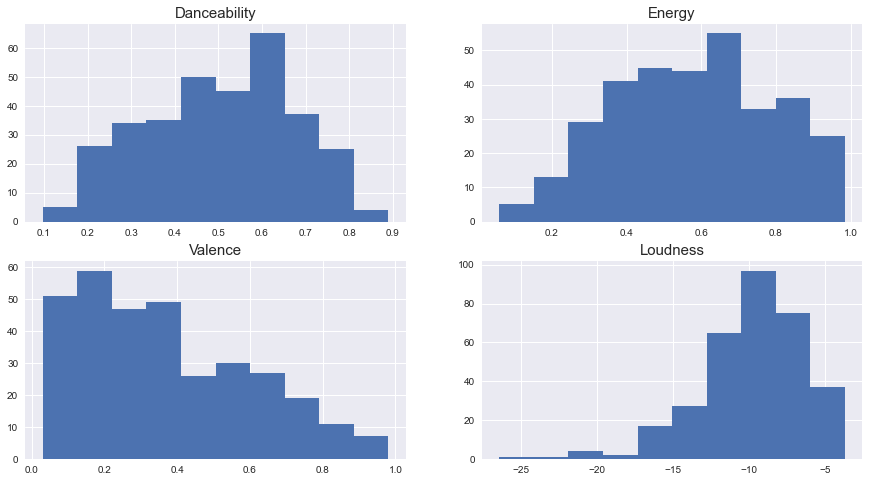

In [28]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [29]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,326.000000,326.000000,326.000000,326.000000,326.000000
mean,37.248466,0.503534,0.579098,0.367138,-9.828160
std,16.883390,0.168487,0.213135,0.234767,3.374255
min,0.000000,0.097100,0.058500,0.030100,-26.405000
25%,28.250000,0.369250,0.420000,0.181000,-11.586000
50%,39.000000,0.514500,0.584000,0.322000,-9.334500
75%,48.000000,0.630750,0.735000,0.544750,-7.431750
max,82.000000,0.890000,0.985000,0.981000,-3.664000


In [30]:
col_features = df.columns[6:]
x = MinMaxScaler().fit_transform(df[col_features])

In [31]:
#col_features,(x)

In [32]:
kmeans = KMeans(init='k-means++',n_clusters=2,random_state=15).fit(x)

In [33]:
df['kmeans'] = kmeans.labels_

In [34]:
df.describe()

,popularity,danceability,energy,valence,loudness,kmeans
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,37.248466,0.503534,0.579098,0.367138,-9.828160,0.500000
std,16.883390,0.168487,0.213135,0.234767,3.374255,0.500769
min,0.000000,0.097100,0.058500,0.030100,-26.405000,0.000000
25%,28.250000,0.369250,0.420000,0.181000,-11.586000,0.000000
50%,39.000000,0.514500,0.584000,0.322000,-9.334500,0.500000
75%,48.000000,0.630750,0.735000,0.544750,-7.431750,1.000000
max,82.000000,0.890000,0.985000,0.981000,-3.664000,1.000000


Text(0.5, 0.92, '3D Scatter Plot for Energy, Danceability, Loudness')

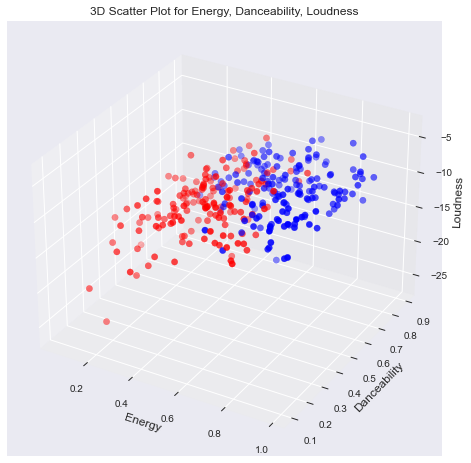

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')
ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot for Energy, Danceability, Loudness")

In [36]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [37]:
cluster_0.to_csv("Data/cluster0.csv",index=False)
cluster_1.to_csv("Data/cluster1.csv",index=False)
df.to_csv("Data/df.csv",index=False)